## Support Vector Machine (SVM)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
from scipy.io import loadmat 
from sklearn import svm 

%matplotlib inline 

In [2]:
data1_path = '/Users/William/Desktop/machineLearning/ex6data1.mat'
data2_path = '/Users/William/Desktop/machineLearning/ex6data2.mat'
data3_path = '/Users/William/Desktop/machineLearning/ex6data3.mat'
data_test_path = '/Users/William/Desktop/machineLearning/spamTest.mat'
data_train_path = '/Users/William/Desktop/machineLearning/spamTrain.mat'

In [3]:
def plot_data(X,y,xlabel,ylabel,pos_label,neg_label, xmin, xmax, ymin, ymax, axes = None):
    plt.rcParams['figure.figsize'] = (20., 14.)
    pos = y[:, 0] == 1 
    neg = y[:, 0] == 0
    if axes == None: 
        axes = plt.gca()

    axes.scatter(X[pos][:,0], X[pos][:,1], marker = 'o', c = '#003f5c', s= 50, linewidths=2, label  = pos_label)
    axes.scatter(X[neg][:,0], X[neg][:,1], marker = 'o', c = '#ffa600', s= 50, linewidths=2, label  = neg_label)

    axes.set_xlim([xmin, xmax])
    axes.set_ylim([ymin, ymax])

    axes.set_xlabel(xlabel, fontsize = 12)
    axes.set_ylabel(ylabel, fontsize = 12)

    axes.legend(bbox_to_anchor = (1,1), fancybox = True)

### SVM with small regularization parameters 

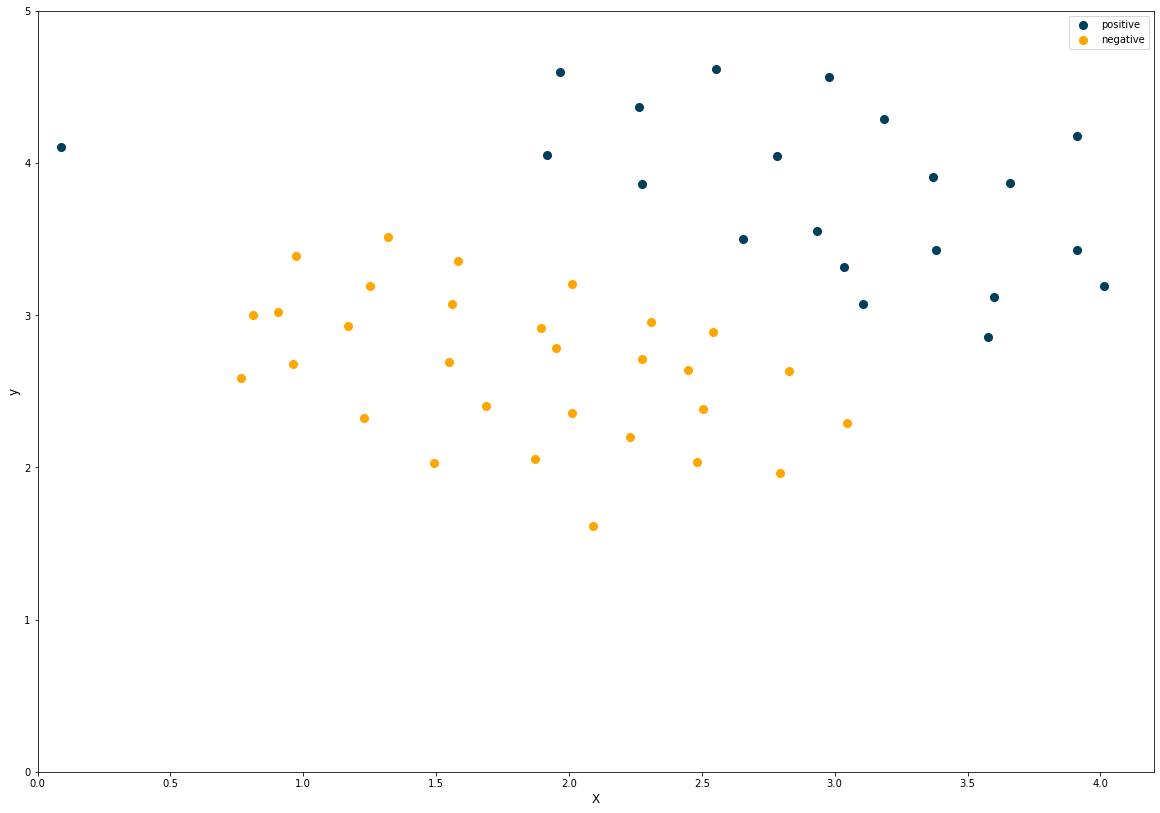

In [4]:
data1 = loadmat(data1_path)

X = data1['X']
y = data1['y']

plot_data(X,y,"X", 'y', 'positive', 'negative', 0, 4.2, 0,5)

this dataset is linearly separable with a noticeable outlier on the left

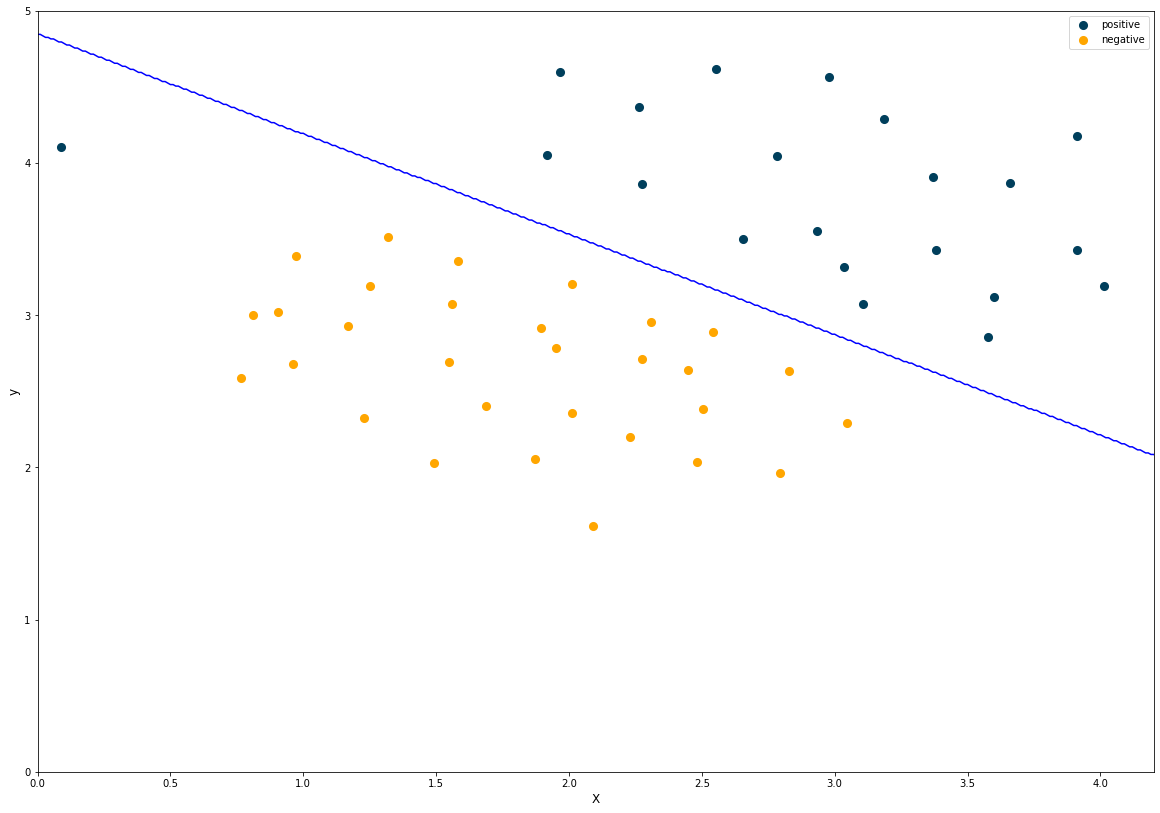

In [5]:
from sklearn import svm 

# Use C=1; regularization param

clf = svm.SVC(kernel = 'linear', C=1.0, decision_function_shape='ovr')
clf.fit(X, y.ravel())

# Plot data and the boundary (hyperplane)
plot_data(X,y,"X", 'y', 'positive', 'negative', 0, 4.2, 0,5)

x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0,5.0, 0.01))
Z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors = 'b')

hyperplane is in blue; the outlier is not taken into account and therebfore misclassified 

### SVM with large regularization parameter 

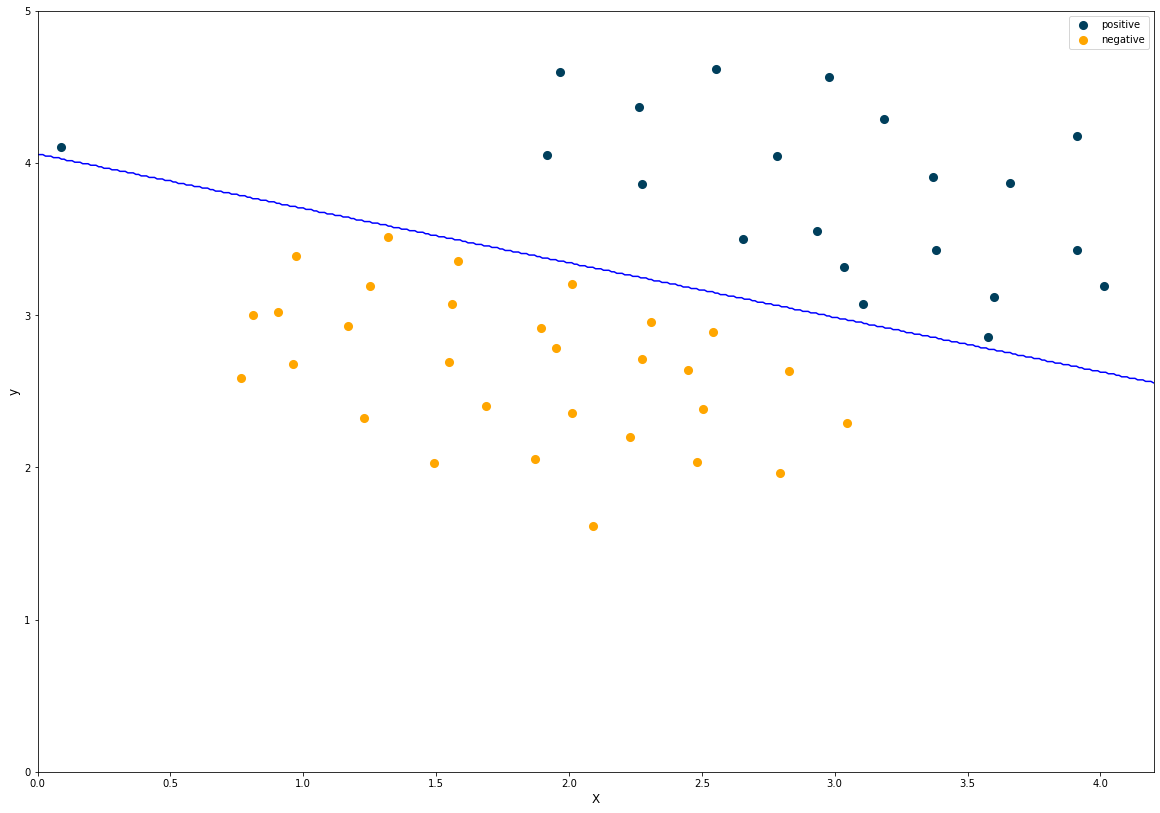

In [6]:
# Use C=100; regularization param

clf = svm.SVC(kernel = 'linear', C=100.0, decision_function_shape='ovr')
clf.fit(X, y.ravel())

# Plot data and the boundary (hyperplane)
plot_data(X,y,"X", 'y', 'positive', 'negative', 0, 4.2, 0,5)

x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0,5.0, 0.01))
Z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors = 'b')

hyperplane shifted to account to the outlier 
- likely overfitting 
- model will NOT generalize well 
- go with previous model that was built 

### SVM with NON-linear boundary 

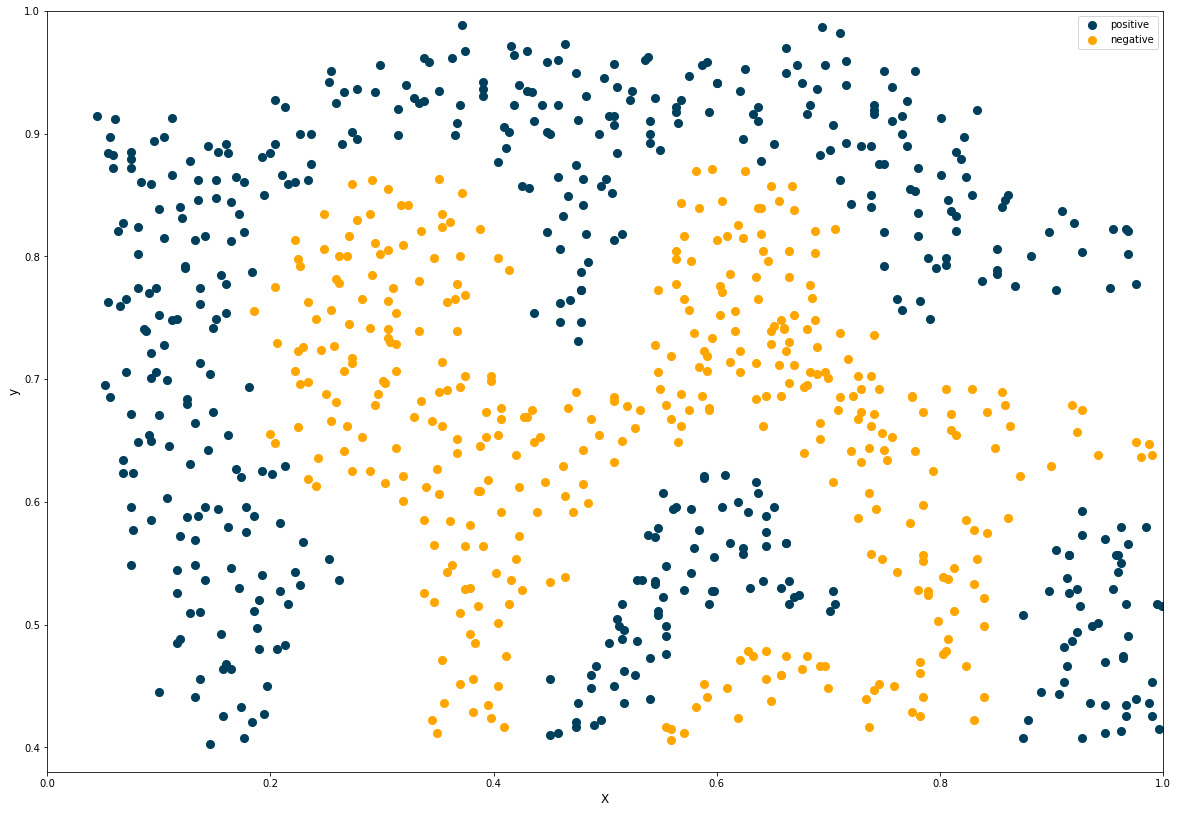

In [7]:
data2 = loadmat(data2_path)

X_2 = data2['X']
y_2 = data2['y']

plot_data(X_2, y_2, 'X', 'y', 'positive', 'negative', 0, 1.0, 0.38, 1.0)

non linear boundary but the classes seem to be separable
- use radial basis function for the kernel 
- gamma: specifies how far the influence of a data point reaches 
    - low value => very far 
    - high value =>  very close 
        - express gamma in a function of sigma 

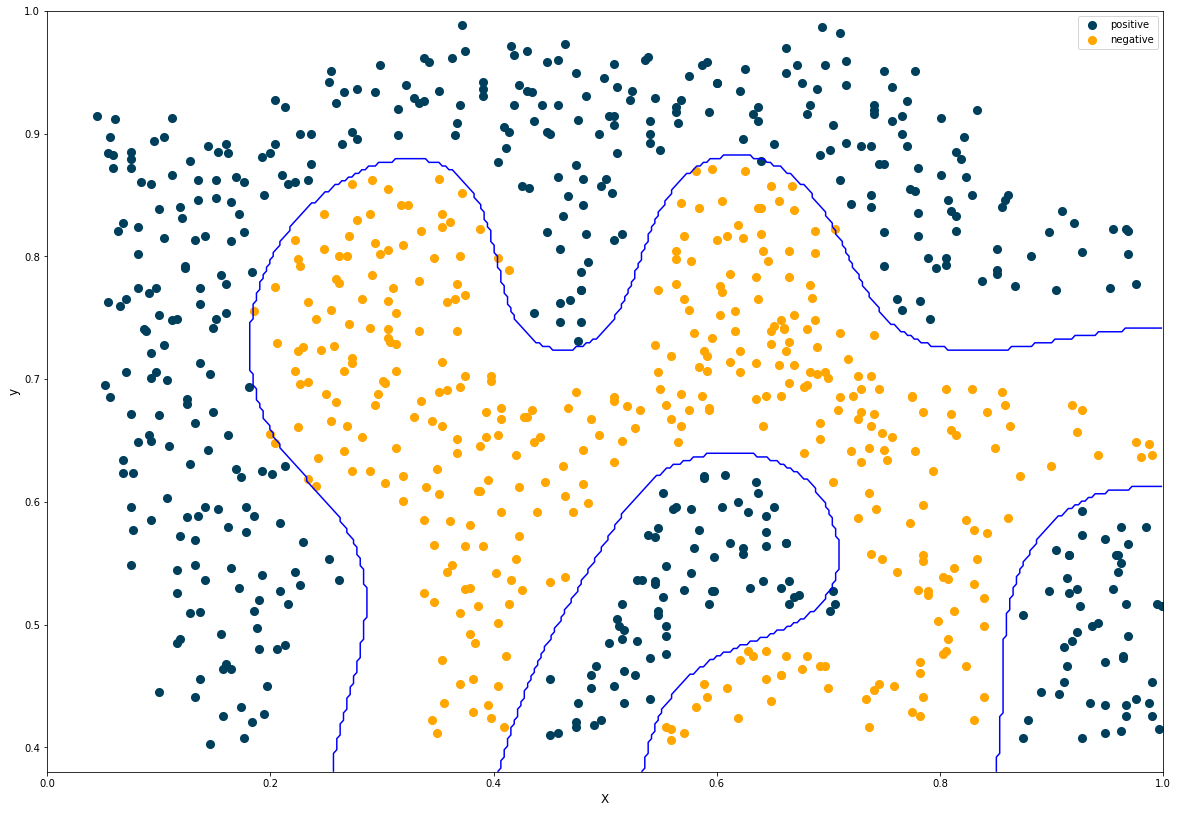

In [8]:
sigma = 0.1
gamma = 1/(2*sigma**2) 

clfg = svm.SVC(kernel = 'rbf', gamma=gamma, C= 1.0, decision_function_shape= 'ovr')
clfg.fit(X_2, y_2.ravel())

plot_data(X_2, y_2, 'X', 'y', 'positive', 'negative', 0, 1.0, 0.38, 1.0)
x_1, x_2 = np.meshgrid(np.arange(0.0, 1.0, 0.003), np.arange(0.38, 1.0, 0.003))
Z = clfg.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors = 'b')

### SVM with cross validation 

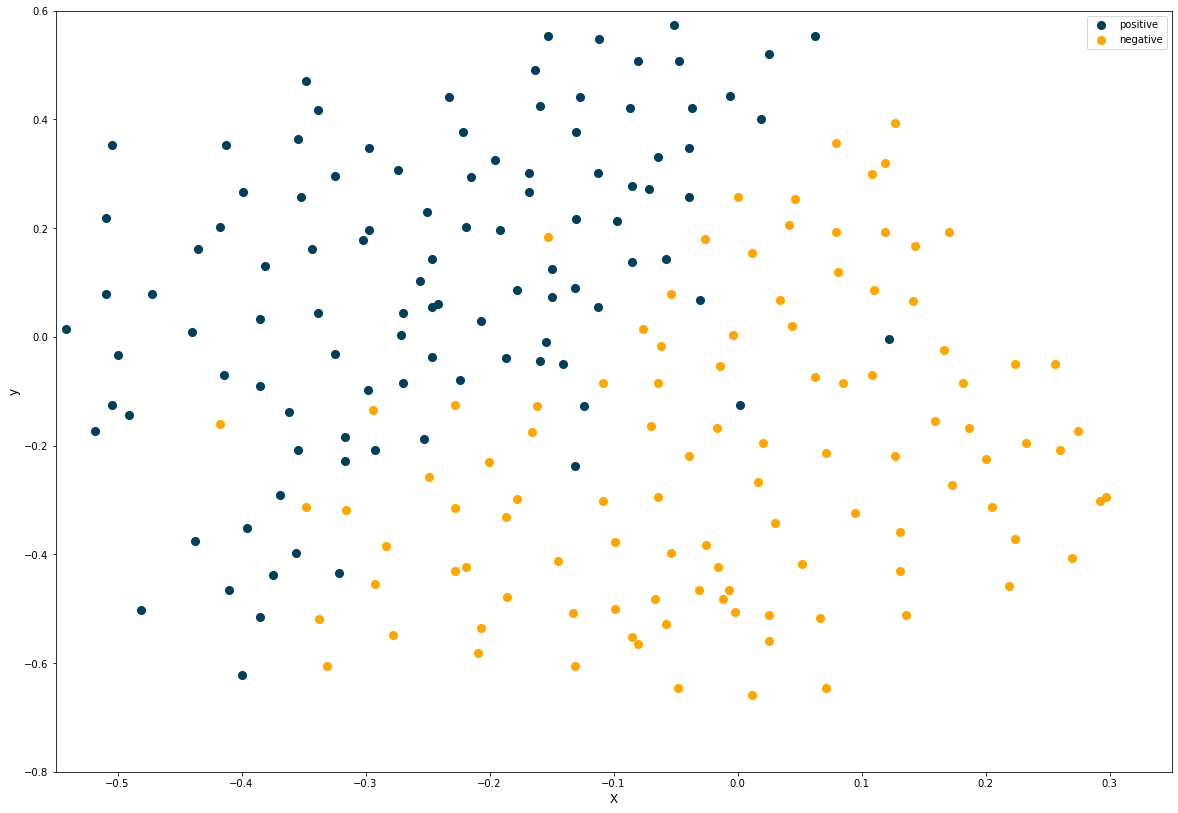

In [9]:
data3 = loadmat(data3_path)

X_3 = data3['X']
y_3 = data3['y']

plot_data(X_3, y_3, 'X', 'y', 'positive', 'negative', -0.55,0.35, -0.8, 0.6)

there is no clear boundary between the classes; there is a significant overlap 

In [10]:
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

errors = list()
sigma_c = list()

for each in sigma: 
    for each_c in C: 
        clf = svm.SVC(kernel = 'rbf', gamma=1/(2*(each**2)), C = each_c, decision_function_shape= 'ovr') 

        clf.fit(X_3, y_3.ravel())
        errors.append(clf.score(data3['Xval'], data3['yval'].ravel()))
        sigma_c.append((each, each_c))

In [11]:
index = np.argmax(errors)

sigma_max, c_max = sigma_c[index]

print(f'The optimal value of sigma is: {sigma_max}')
print(f'The optimal value of C is: {c_max}')

The optimal value of sigma is: 0.1
The optimal value of C is: 1


Values of sigma and C will be used to fit the SVM algorithm 

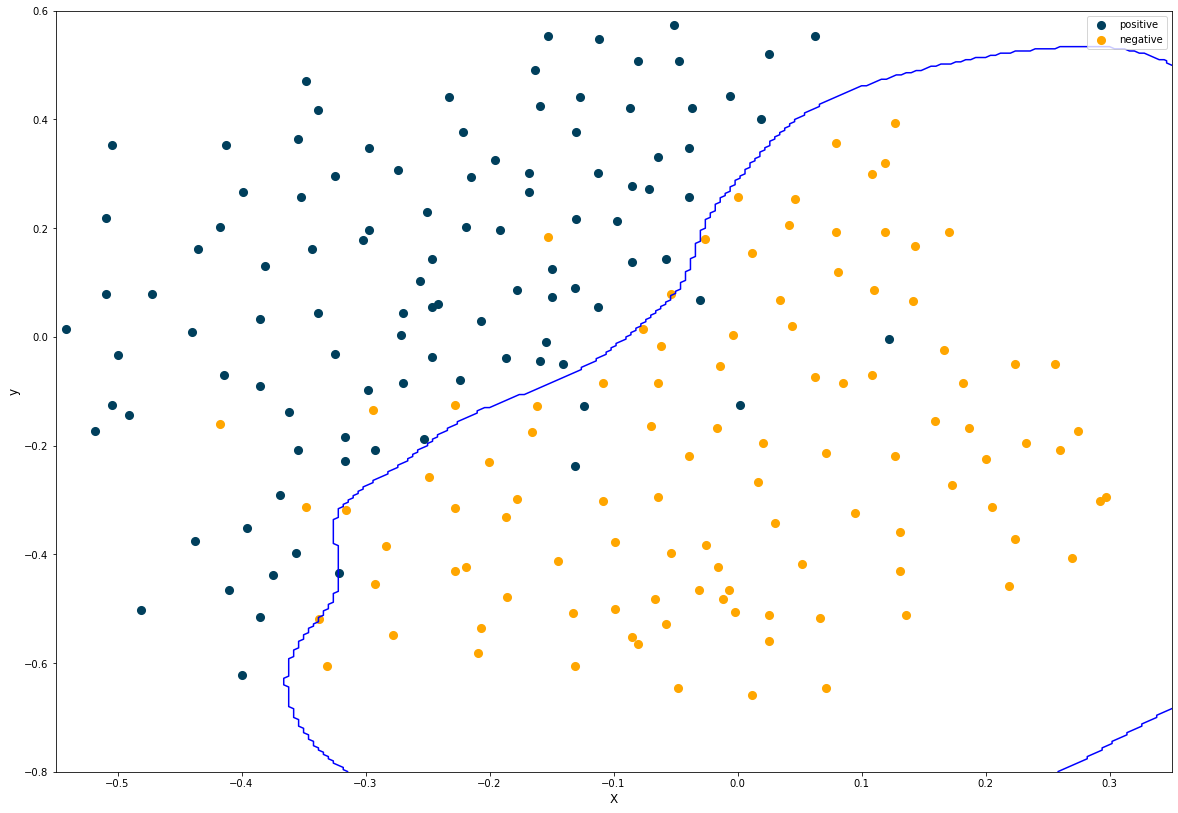

In [12]:
sigma = 0.1 
gamma = 1/(2*sigma**2)

optimal_clf = svm.SVC(kernel = 'rbf', gamma = gamma, C=1.0, decision_function_shape= 'ovr')
optimal_clf.fit(X_3, y_3.ravel())

plot_data(X_3, y_3, 'X', 'y', 'positive', 'negative', -0.55,0.35, -0.8, 0.6)
x_1, x_2 = np.meshgrid(np.arange(-0.6, 0.4, 0.004), np.arange(-0.8, 0.6, 0.004))
Z = optimal_clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors = 'b')

### Spam classification of our emails 

In [13]:
spam_train = loadmat(data_train_path)
spam_test = loadmat(data_test_path)

C = 0.1  
# regularization to 0.1

X_train = spam_train['X']
y_train = spam_train['y']

X_test = spam_test['Xtest']
y_test = spam_test['ytest']

clf_spam = svm.SVC(kernel = 'linear', C=C, decision_function_shape= 'ovr')
clf_spam.fit(X_train, y_train.ravel())

train_acc = clf_spam.score(spam_train['X'], spam_train['y'].ravel())
test_acc = clf_spam.score(X_test, y_test.ravel())

print(f'The training accuracy: {train_acc*100}%')
print(f'The test accuracy: {test_acc*100}%')

The training accuracy: 99.825%
The test accuracy: 98.9%
